<a href="https://colab.research.google.com/github/srilasya1815/FMMLlab2024/blob/main/Module_9_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

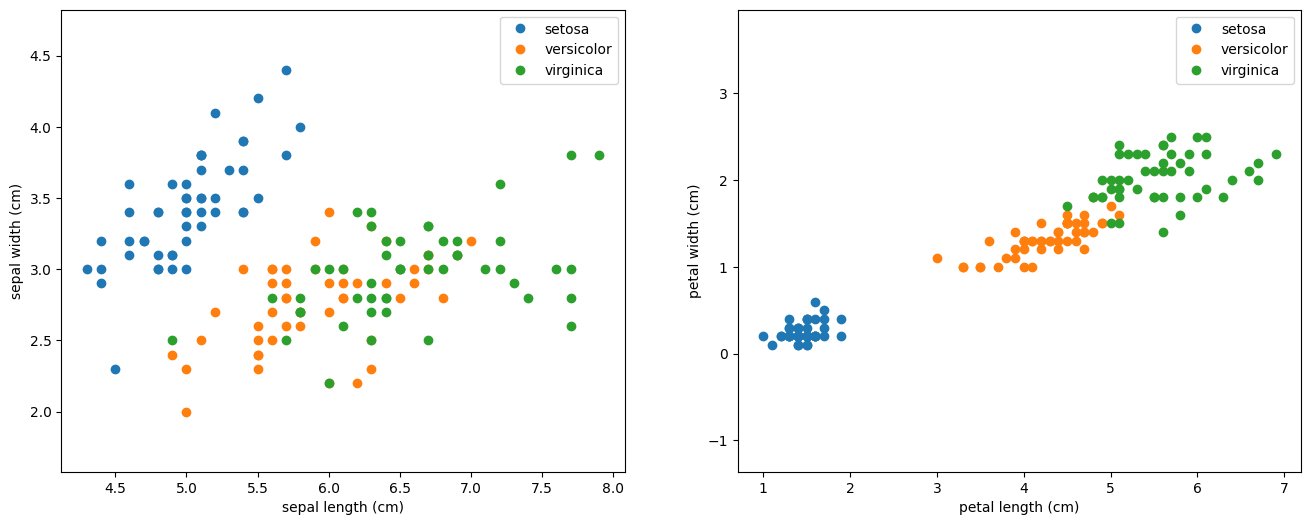

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 390.86it/s]


# Plot training progress

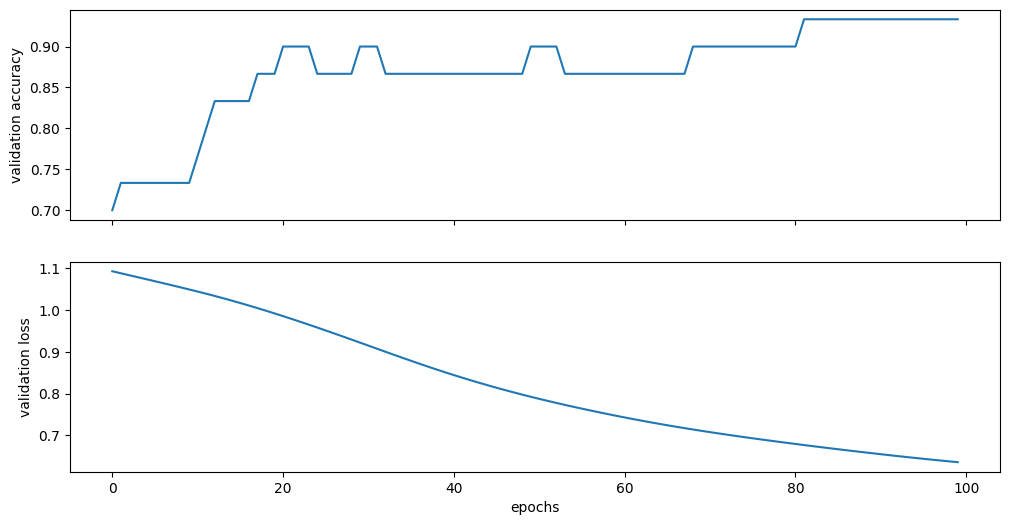

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, input_dim, num_hidden_layers=2):  # Added num_hidden_layers parameter
        super(Model, self).__init__()

        self.layers = nn.ModuleList()  # Using ModuleList to hold layers dynamically
        self.layers.append(nn.Linear(input_dim, 50))

        for _ in range(num_hidden_layers - 1):  # Add hidden layers based on the parameter
            self.layers.append(nn.Linear(50, 50))

        self.layers.append(nn.Linear(50, 3))  # Output layer

    def forward(self, x):
        for layer in self.layers[:-1]:  # Iterate through all layers except the last
            x = F.relu(layer(x))

        x = F.softmax(self.layers[-1](x), dim=1)  # Apply softmax to the output layer
        return x

# Example usage:
model = Model(X_train.shape[1], num_hidden_layers=3)  # Create a model with 3 hidden layers

**Reasoning and Steps :**
  1.  **Flexibility with num_hidden_layers**: The Model class now takes an optional num_hidden_layers parameter, defaulting to 2 to match the original structure. You can easily change this value (e.g., num_hidden_layers=3 for 3 hidden layers) when creating the model instance.

  2.  **Dynamic Layer Creation**: Instead of manually defining layer1, layer2, etc., we use nn.ModuleList to store the layers. This allows us to create the desired number of hidden layers using a loop.

  3.  **Loop for Hidden Layers**: The for loop adds nn.Linear layers (with 50 neurons each) to the self.layers list based on num_hidden_layers.

  4.  **Forward Pass**: In the forward method, we iterate through the layers in self.layers (excluding the output layer) and apply ReLU activation. Finally, we apply softmax to the output layer's result.




2. Try changing the number of neurons in the hidden layer.

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, input_dim, num_hidden_layers=2, hidden_layer_size=50):  # Added hidden_layer_size parameter
        super(Model, self).__init__()

        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_layer_size))

        for _ in range(num_hidden_layers - 1):
            self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))

        self.layers.append(nn.Linear(hidden_layer_size, 3))

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))

        x = F.softmax(self.layers[-1](x), dim=1)
        return x

# Example usage:
model = Model(X_train.shape[1], num_hidden_layers=2, hidden_layer_size=100)  # Create a model with 100 neurons in each hidden layer

**Reasoning and steps**:

   1. **hidden_layer_size Parameter**: The Model class now accepts an optional hidden_layer_size parameter, which determines the number of neurons in each hidden layer. It defaults to 50, preserving the original structure.

   2. **Layer Creation**: When creating the nn.Linear layers, the hidden_layer_size parameter is used to specify the output dimension of each hidden layer (and the input dimension for subsequent hidden layers).

   3. **Forward Pass**: The forward method remains similar, iterating through the layers and applying ReLU activation to the hidden layers.


3. Try using a different activation function.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, input_dim, num_hidden_layers=2, hidden_layer_size=50, activation_function='relu'):
        super(Model, self).__init__()

        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_layer_size))

        for _ in range(num_hidden_layers - 1):
            self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))

        self.layers.append(nn.Linear(hidden_layer_size, 3))

        # Store the activation function
        self.activation_function = activation_function

    def forward(self, x):
        for layer in self.layers[:-1]:
            if self.activation_function == 'relu':
                x = F.relu(layer(x))
            elif self.activation_function == 'sigmoid':
                x = torch.sigmoid(layer(x))
            elif self.activation_function == 'tanh':
                x = torch.tanh(layer(x))
            # Add more activation functions here if needed

        x = F.softmax(self.layers[-1](x), dim=1)
        return x

# Example usage:
model = Model(X_train.shape[1], activation_function='sigmoid')  # Create a model with sigmoid activation

**Reasoning and Steps:**

   1. **activation_function Parameter**: An activation_function parameter is added to the Model class's __init__ method. This parameter allows you to specify the desired activation function when creating the model instance. The default is set to 'relu'.

   2. **Conditional Activation**: Inside the forward method, an if-elif block is used to apply the chosen activation function to the output of each hidden layer.

   3. **Adding More Activations**: You can extend the if-elif block to include other activation functions like torch.tanh, F.leaky_relu, etc., as needed.

**Experimentation**:

Now you can create models with different activation functions by passing the corresponding string to the activation_function parameter:

   * model = Model(X_train.shape[1], activation_function='sigmoid') for sigmoid activation.
   * model = Model(X_train.shape[1], activation_function='tanh') for tanh activation.
   * And so on.



can you observe any changes ?

1. **changing the number if hidden layers:**

In [12]:
class Model(nn.Module):
    def __init__(self, input_dim, num_hidden_layers=2):
        super(Model, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, 50))
        for _ in range(num_hidden_layers - 1):
            self.layers.append(nn.Linear(50, 50))
        self.layers.append(nn.Linear(50, 3))
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        x = F.softmax(self.layers[-1](x), dim=1)
        return x

# Example usage:
model = Model(X_train.shape[1], num_hidden_layers=3)  # Now with 3 hidden layers


   * Change: Introduced the num_hidden_layers parameter in the __init__ method.
   * Effect: Allows you to specify the desired number of hidden layers when creating the model.
   * How to Use: Pass the desired number of hidden layers as an argument when creating the model instance (e.g., num_hidden_layers=3).



2. **Changing the number of Neurons in Hidden layer**:

In [13]:
class Model(nn.Module):
    def __init__(self, input_dim, num_hidden_layers=2, hidden_layer_size=50):
        super(Model, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_layer_size))
        for _ in range(num_hidden_layers - 1):
            self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))
        self.layers.append(nn.Linear(hidden_layer_size, 3))
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        x = F.softmax(self.layers[-1](x), dim=1)
        return x

# Example usage:
model = Model(X_train.shape[1], num_hidden_layers=2, hidden_layer_size=100)  # Now with 100 neurons per hidden layer


   * Change: Added the hidden_layer_size parameter in the __init__ method.
   * Effect: Controls the number of neurons in each hidden layer.
   * How to Use: Provide the desired number of neurons as an argument when creating the model (e.g., hidden_layer_size=100).


**3. Using a Different Activation Function:**

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, input_dim, num_hidden_layers=2, hidden_layer_size=50, activation_function='relu'):
        super(Model, self).__init__()

        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_layer_size))

        for _ in range(num_hidden_layers - 1):
            self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))

        self.layers.append(nn.Linear(hidden_layer_size, 3))

        # Store the activation function
        self.activation_function = activation_function

    def forward(self, x):  # The forward method should be indented
        for layer in self.layers[:-1]:
            if self.activation_function == 'relu':
                x = F.relu(layer(x))
            elif self.activation_function == 'sigmoid':
                x = torch.sigmoid(layer(x))
            elif self.activation_function == 'tanh':
                x = torch.tanh(layer(x))
            # Add more activation functions here if needed

        x = F.softmax(self.layers[-1](x), dim=1)
        return x

# Example usage:
model = Model(X_train.shape[1], activation_function='sigmoid')  # Create a model with sigmoid activation


   * Change: Introduced the activation_function parameter and conditional logic in the forward method.
   * Effect: Enables you to switch between different activation functions.
   * How to Use: Specify the desired activation function as a string argument when creating the model (e.g., activation_function='sigmoid').
